<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Camion_transporte_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sumulación    I**                                                                               
**Ejercicio 1**


La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial
para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.
El peso de cada tina sigue la siguiente distribución de probabilidad:



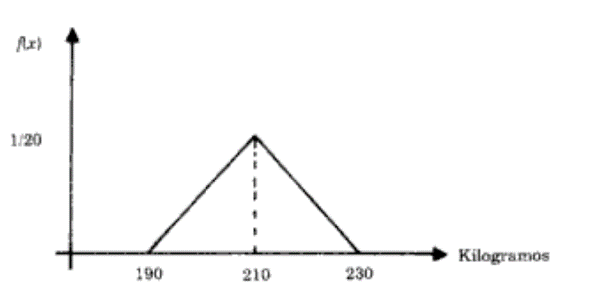


Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso
de las tinas exceda la capacidad del camión?                                           
**(a) Resolver analíticamente.**                             

Solución:

Usumamos nuestra función triangular:                                             
donde :                                                                            
$$
x_i \sim Tri (a,b,c)
$$

con:

 $$
 a=190
 $$

 $$
 b=230
 $$

 $$
 c=210
 $$

 De acuerdo con los datos, obtenemos como función de densidad:

$$
f(x) = \left\{
            \begin{array}{ll}
	      \frac{x-190}{400} & \mathrm{si\ } 190<x\leq 210 \\
	      \frac{230-x}{400} & \mathrm{si\ } 210<x\leq 230
            \end{array}
	      \right.\
$$

Ahora sacamos el valor la media de la distribución triangular:

$$
μ=\frac{a+b+c}{3}
$$

Sustituyendo los terminos:

$$
μ=E(x)=\frac{190+230+210}{3}=210
$$

Y la varianza de la distribución triangula:

$$
Var(x)=\frac{a^2+b^2+c^2-(ab)-(ac)-(bc)}{18}
$$

Sustituyendo valores:

$$
Var(x)=\frac{190^2+230^2+210^2-190(230)-190(210)-230(210)}{18}=\frac{200}{3}≈66.67
$$
Calculamos la probabilidad, donde $x_i$ es el peso de una tina, con $i = \{1, 2, 3, 4, 5\}$

$$
P(x_1+x_2+x_3+x_4+x_5>1000)
$$

Por el Teorema central del límite

$$
P\left(\frac{x_1+x_2+x_3+x_4+x_5}{5}>200\right)=P(\bar{x}>200)=P\left(\frac{\bar{x}-μ}{\frac{σ}{\sqrt{5}}}>\frac{200-210}{\sqrt{\frac{200}{3(5)}}}\right)=P(z>-2.73)
$$

Usando la tabla de valores de normal estandar

$$
P(x_1+x_2+x_3+x_4+x_5>1000)=1-0.003=0.997
$$


$\therefore$ su probabilidad es del 99.7%

**(b) Resolver por simulación.**

La probabilidad es: 0.9974


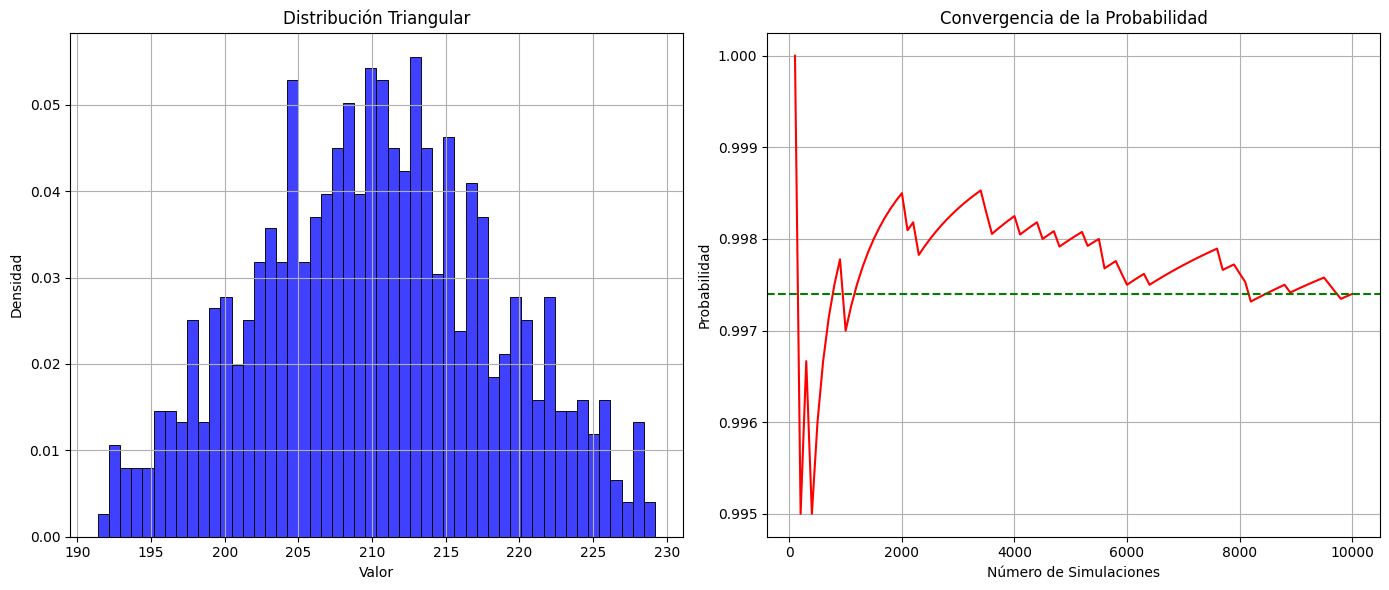

In [ ]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

def triangular(a, b, c, n):
    lista = []
    for i in range(n):
        U = rnd.random()
        y = (b - a) / (c - a)
        if 0 <= U <= y:
            X = a + ((b - a) * (c - a) * U) ** (1/2)
        else:
            X = c - ((c - b) * (c - a) * (1 - U)) ** (1/2)
        lista.append(X)
    return lista

def sim_tinas(a, b, c, N):
    contador = 0
    probabilidades = []
    for i in range(1, N+1):
        muestras = triangular(a, b, c, 5)
        if sum(muestras) > 1000:
            contador += 1
        if i % 100 == 0:  # Guardar la probabilidad cada 100 iteraciones para la gráfica
            probabilidades.append(contador / i)
    prob = contador / N
    return prob, probabilidades

# Parámetros del triángulo y número de simulaciones
a = 190
b = 230
c = 210
N = 10000

# Ejecutar la simulación
probabilidad, probabilidades = sim_tinas(a, b, c, N)
print(f'La probabilidad es: {probabilidad}')

# Generar datos para la distribución triangular
datos_triangulares = triangular(190, 210, 230, 1000)

# Graficar la distribución triangular
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(datos_triangulares, bins=50, kde=False, color='blue', stat='density')
plt.title('Distribución Triangular')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid()

# Graficar la convergencia de la probabilidad
plt.subplot(1, 2, 2)
plt.plot(range(100, N+1, 100), probabilidades, color='red')
plt.axhline(y=probabilidad, color='green', linestyle='--')
plt.title('Convergencia de la Probabilidad')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Probabilidad')
plt.grid()

plt.tight_layout()
plt.show()


**Ejercicio 2.**

Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que
cada vez que la capacidad del camión es excedida una tina es enviada a través de otra
compañía a un costo de 200. También suponga que el costo promedio anual de un
nuevo camión es de $60, 000. Si se trabaja 5 días a la semana y 52 semanas al año,
¿cuál de las dos alternativas mencionadas es la más atractiva?                         
**(a) Resolver analíticamente.**

Solución:

Dado que el problema nos indica que solo se laboran 5 días a la semana y son 52 semanas por año tenemos que:

 5 dias x 52 semanas = 260 dias

Y como ya sabemos de acuerdo al ejercicio anteriro la probabilidad de que el peso de las tinas exceda la capacidad del camión es del $99.7\%$, así

Entonces:

$$
260\ días*0.997*\$200=\$51,844
$$

Lo cual esto nos dice que en un año se gastan $51,844 en enviar tinas a otra compañia, y la segunda opción es comprar un camión con un costo de 60,000  dicho esto,  nuestra mejor alternativa es seguir pagando por los excedentes.

 **(b) Resolver por simulación.**

La probabilidad es: 0.9971
Costo anual de enviar tinas adicionales: $51849.20
Costo anual de adquirir un nuevo camión: $60000.00
Es más conveniente enviar las tinas adicionales a través de otra compañía.


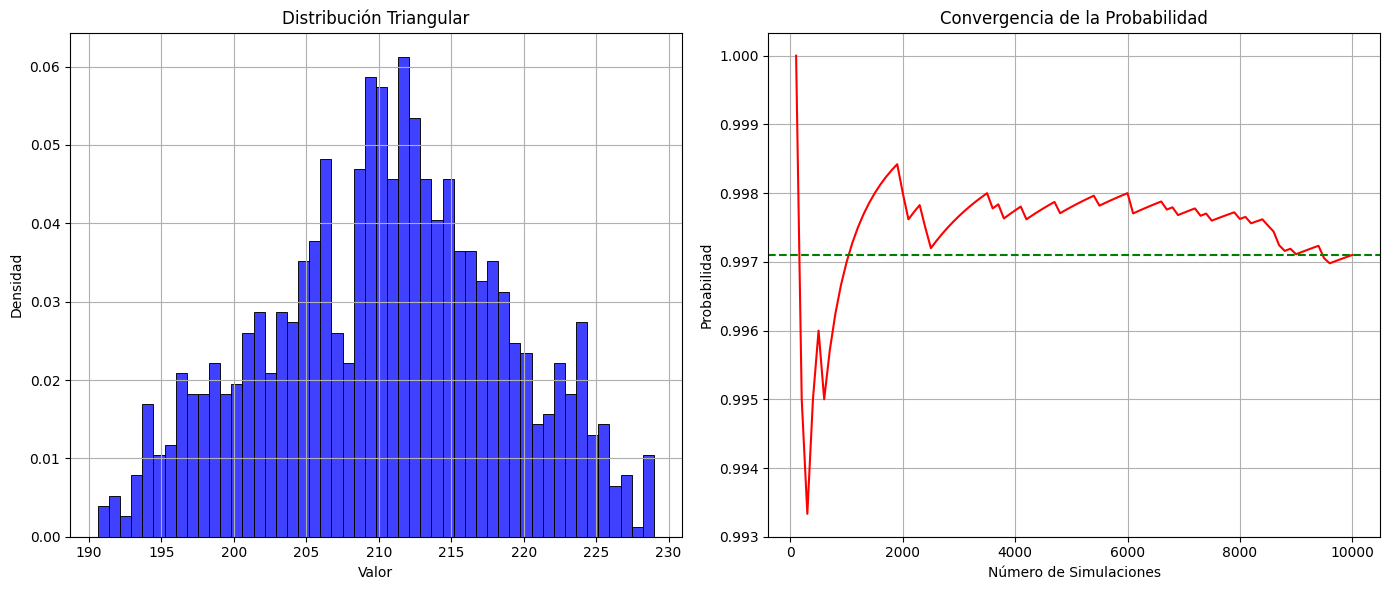

In [ ]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

def triangular(a, b, c, n):
    lista = []
    for i in range(n):
        U = rnd.random()
        y = (b - a) / (c - a)
        if 0 <= U <= y:
            X = a + ((b - a) * (c - a) * U) ** (1/2)
        else:
            X = c - ((c - b) * (c - a) * (1 - U)) ** (1/2)
        lista.append(X)
    return lista

def sim_tinas(a, b, c, N):
    contador = 0
    probabilidades = []
    for i in range(1, N+1):
        muestras = triangular(a, b, c, 5)
        if sum(muestras) > 1000:
            contador += 1
        if i % 100 == 0:  # Guardar la probabilidad cada 100 iteraciones para la gráfica
            probabilidades.append(contador / i)
    prob = contador / N
    return prob, probabilidades

# Parámetros del triángulo y número de simulaciones
a = 190
b = 230
c = 210
N = 10000

# Ejecutar la simulación
probabilidad, probabilidades = sim_tinas(a, b, c, N)
print(f'La probabilidad es: {probabilidad}')

# Calcular el costo anual de enviar tinas adicionales
dias_de_trabajo = 5 * 52
costo_envio_tina = 200
costo_anual_envio_tinas = probabilidad * dias_de_trabajo * costo_envio_tina
# Costo anual de un nuevo camión
costo_anual_camion = 60000

# Comparar costos
print(f'Costo anual de enviar tinas adicionales: ${costo_anual_envio_tinas:.2f}')
print(f'Costo anual de adquirir un nuevo camión: ${costo_anual_camion:.2f}')

if costo_anual_envio_tinas < costo_anual_camion:
    print("Es más conveniente enviar las tinas adicionales a través de otra compañía.")
else:
    print("Es más conveniente adquirir un nuevo camión.")

# Generar datos para la distribución triangular
datos_triangulares = triangular(190, 210, 230, 1000)

# Graficar la distribución triangular
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(datos_triangulares, bins=50, kde=False, color='blue', stat='density')
plt.title('Distribución Triangular')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid()

# Graficar la convergencia de la probabilidad
plt.subplot(1, 2, 2)
plt.plot(range(100, N+1, 100), probabilidades, color='red')
plt.axhline(y=probabilidad, color='green', linestyle='--')
plt.title('Convergencia de la Probabilidad')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Probabilidad')
plt.grid()

plt.tight_layout()
plt.show()
